# Vaccinations data analysis

In [41]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1 import make_axes_locatable

import os
from os.path import join
import pandas as pd
import numpy as np
import json
import seaborn as sns

from scseirx import analysis_functions as af
import data_analysis_functions as daf
from data_creation_functions import format_none_column

In [65]:
src_path = '../../data/intervention_measures_delta/simulation_results' 
baseline_data = daf.get_baseline_data(src_path)
baseline_data['half_classes'] = baseline_data['half_classes'].astype(bool)

selected_baseline_data = baseline_data.copy()
selected_baseline_data = selected_baseline_data[\
                (selected_baseline_data['ventilation_modification'] == 0.36)]

In [46]:
param_collection = {}
vaccination_params = pd.read_csv(join('../vaccinations/screening_params',
                                     'vaccinations.csv'))
vaccination_params['s_screen_interval']=vaccination_params['s_screen_interval']\
    .apply(format_none_column).fillna('never')
vaccination_params['t_screen_interval']=vaccination_params['t_screen_interval']\
    .apply(format_none_column).fillna('never')

vaccination_params_scenario_1 = vaccination_params[\
                vaccination_params['student_vaccination_ratio'] == 0]
vaccination_params_scenario_2 = vaccination_params[\
                vaccination_params['student_vaccination_ratio'] == 0.5]
param_collection['vaccination_scenario_1'] = vaccination_params_scenario_1
param_collection['vaccination_scenario_2'] = vaccination_params_scenario_2

src_path = '../../data/vaccinations/simulation_results/'
vaccination_data_scenario_1 = daf.get_vaccination_data(src_path,
                                    param_collection['vaccination_scenario_1'])
vaccination_data_scenario_1['half_classes'] = \
    vaccination_data_scenario_1['half_classes'].astype(bool)
vaccination_data_scenario_2 = daf.get_vaccination_data(src_path,
                                    param_collection['vaccination_scenario_2'])
vaccination_data_scenario_2['half_classes'] = \
    vaccination_data_scenario_2['half_classes'].astype(bool)

	primary
	primary_dc
	lower_secondary
	lower_secondary_dc
	upper_secondary
	secondary
	primary
	primary_dc
	lower_secondary
	lower_secondary_dc
	upper_secondary
	secondary


In [66]:
observables_of_interest = ['infected_agents', 'R0']

school_types = ['primary', 'primary_dc', 'lower_secondary', 'lower_secondary_dc',
                'upper_secondary', 'secondary']

stype_names = {'primary':'primary', 'primary_dc':'primary\nwith daycare',
               'lower_secondary':'lower\nsecondary',
               'lower_secondary_dc':'lower\nsecondary\nwith daycare',
               'upper_secondary':'upper\nsecondary', 'secondary':'secondary',
               'secondary_dc':'secondary\nwith daycare'}

In [67]:
measure_combinations = [
    # ventilation + testing 1x
    {
        'label':'vent. + testing 1x',
        'student_mask':False,
        'teacher_mask':False,
        'student_screen_interval':7,
        'teacher_screen_interval':7,
        'half_classes':False
    },
    # ventilation + testing 2x
    {
        'label':'vent. + testing 2x',
        'student_mask':False,
        'teacher_mask':False,
        'student_screen_interval':3,
        'teacher_screen_interval':3,
        'half_classes':False
    },
    # ventilation + testing 1x + masks
    {
        'label':'vent. + testing 1x + masks',
        'student_mask':True,
        'teacher_mask':True,
        'student_screen_interval':7,
        'teacher_screen_interval':7,
        'half_classes':False
    },
    # ventilation + testing 2x + masks
    {
        'label':'vent. + testing 2x + masks',
        'student_mask':True,
        'teacher_mask':True,
        'student_screen_interval':3,
        'teacher_screen_interval':3,
        'half_classes':False
    },
    # ventilation + testing 1x + reduced class size 
    {
        'label':'vent. + testing 1x + red. class size',
        'student_mask':False,
        'teacher_mask':False,
        'student_screen_interval':7,
        'teacher_screen_interval':7,
        'half_classes':True
    },
    # ventilation + testing 2x + reduced class size 
    {
        'label':'vent. + testing 2x + red. class size',
        'student_mask':False,
        'teacher_mask':False,
        'student_screen_interval':3,
        'teacher_screen_interval':3,
        'half_classes':True
    },
    # ventilation + masks + reduced class size
    {
        'label':'vent. + masks + red. class size',
        'student_mask':True,
        'teacher_mask':True,
        'student_screen_interval':'never',
        'teacher_screen_interval':'never',
        'half_classes':True
    }
]

In [54]:
mc['student_mask']

False

In [55]:
mc['teacher_mask']

False

In [56]:
mc['student_screen_interval']

7

In [57]:
mc['teacher_screen_interval']

7

In [58]:
mc['half_classes']

False

In [63]:
baseline_data

,test_type,turnover,index_case,student_screen_interval,teacher_screen_interval,student_mask,teacher_mask,half_classes,ventilation_modification,N_diagnostic_tests_0.025,...,student_testing_rate,teacher_testing_rate,mask_efficiency_inhale,mask_efficiency_exhale,base_transmission_risk_multiplier,friendship_ratio,student_vaccination_ratio,teacher_vaccination_ratio,family_member_vaccination_ratio,class_size_reduction
0,antigen,0.0,student,never,never,0.0,0.0,False,1.00,0.0,...,1.0,1.0,0.7,0.5,1.0,0.0,0.0,0.0,0.0,0.0
1,antigen,0.0,teacher,never,never,0.0,0.0,False,1.00,0.0,...,1.0,1.0,0.7,0.5,1.0,0.0,0.0,0.0,0.0,0.0
2,antigen,0.0,student,7.0,never,0.0,0.0,False,1.00,0.0,...,1.0,1.0,0.7,0.5,1.0,0.0,0.0,0.0,0.0,0.0
3,antigen,0.0,teacher,7.0,never,0.0,0.0,False,1.00,0.0,...,1.0,1.0,0.7,0.5,1.0,0.0,0.0,0.0,0.0,0.0
4,antigen,0.0,student,3.0,never,0.0,0.0,False,1.00,0.0,...,1.0,1.0,0.7,0.5,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,antigen,0.0,teacher,never,never,0.0,0.0,False,0.36,0.0,...,1.0,1.0,0.7,0.5,1.0,0.0,0.0,0.0,0.0,0.0
128,antigen,0.0,student,3.0,3.0,0.0,0.0,True,0.36,0.0,...,1.0,1.0,0.7,0.5,1.0,0.0,0.0,0.0,0.0,0.5
129,antigen,0.0,teacher,3.0,3.0,0.0,0.0,True,0.36,0.0,...,1.0,1.0,0.7,0.5,1.0,0.0,0.0,0.0,0.0,0.5
130,antigen,0.0,student,3.0,3.0,1.0,1.0,False,0.36,0.0,...,1.0,1.0,0.7,0.5,1.0,0.0,0.0,0.0,0.0,0.0


In [64]:
baseline_data[baseline_data['student_screen_interval'] == 7]

,test_type,turnover,index_case,student_screen_interval,teacher_screen_interval,student_mask,teacher_mask,half_classes,ventilation_modification,N_diagnostic_tests_0.025,...,student_testing_rate,teacher_testing_rate,mask_efficiency_inhale,mask_efficiency_exhale,base_transmission_risk_multiplier,friendship_ratio,student_vaccination_ratio,teacher_vaccination_ratio,family_member_vaccination_ratio,class_size_reduction
2,antigen,0.0,student,7.0,never,0.0,0.0,False,1.0,0.0,...,1.0,1.0,0.7,0.5,1.0,0.0,0.0,0.0,0.0,0.0
3,antigen,0.0,teacher,7.0,never,0.0,0.0,False,1.0,0.0,...,1.0,1.0,0.7,0.5,1.0,0.0,0.0,0.0,0.0,0.0
24,antigen,0.0,student,7.0,never,0.0,0.0,False,1.0,0.0,...,1.0,1.0,0.7,0.5,1.0,0.0,0.0,0.0,0.0,0.0
25,antigen,0.0,teacher,7.0,never,0.0,0.0,False,1.0,0.0,...,1.0,1.0,0.7,0.5,1.0,0.0,0.0,0.0,0.0,0.0
46,antigen,0.0,student,7.0,never,0.0,0.0,False,1.0,0.0,...,1.0,1.0,0.7,0.5,1.0,0.0,0.0,0.0,0.0,0.0
47,antigen,0.0,teacher,7.0,never,0.0,0.0,False,1.0,0.0,...,1.0,1.0,0.7,0.5,1.0,0.0,0.0,0.0,0.0,0.0
68,antigen,0.0,student,7.0,never,0.0,0.0,False,1.0,0.0,...,1.0,1.0,0.7,0.5,1.0,0.0,0.0,0.0,0.0,0.0
69,antigen,0.0,teacher,7.0,never,0.0,0.0,False,1.0,0.0,...,1.0,1.0,0.7,0.5,1.0,0.0,0.0,0.0,0.0,0.0
90,antigen,0.0,student,7.0,never,0.0,0.0,False,1.0,0.0,...,1.0,1.0,0.7,0.5,1.0,0.0,0.0,0.0,0.0,0.0
91,antigen,0.0,teacher,7.0,never,0.0,0.0,False,1.0,0.0,...,1.0,1.0,0.7,0.5,1.0,0.0,0.0,0.0,0.0,0.0


In [53]:
data

,test_type,turnover,index_case,student_screen_interval,teacher_screen_interval,student_mask,teacher_mask,half_classes,ventilation_modification,N_diagnostic_tests_0.025,...,student_testing_rate,teacher_testing_rate,mask_efficiency_inhale,mask_efficiency_exhale,base_transmission_risk_multiplier,friendship_ratio,student_vaccination_ratio,teacher_vaccination_ratio,family_member_vaccination_ratio,class_size_reduction
16,antigen,0.0,student,never,never,0.0,0.0,False,0.36,0.0,...,1.0,1.0,0.7,0.5,1.0,0.0,0.0,0.0,0.0,0.0
17,antigen,0.0,teacher,never,never,0.0,0.0,False,0.36,0.0,...,1.0,1.0,0.7,0.5,1.0,0.0,0.0,0.0,0.0,0.0
18,antigen,0.0,student,3.0,3.0,0.0,0.0,True,0.36,0.0,...,1.0,1.0,0.7,0.5,1.0,0.0,0.0,0.0,0.0,0.5
19,antigen,0.0,teacher,3.0,3.0,0.0,0.0,True,0.36,0.0,...,1.0,1.0,0.7,0.5,1.0,0.0,0.0,0.0,0.0,0.5
20,antigen,0.0,student,3.0,3.0,1.0,1.0,False,0.36,0.0,...,1.0,1.0,0.7,0.5,1.0,0.0,0.0,0.0,0.0,0.0
21,antigen,0.0,teacher,3.0,3.0,1.0,1.0,False,0.36,0.0,...,1.0,1.0,0.7,0.5,1.0,0.0,0.0,0.0,0.0,0.0
38,antigen,0.0,student,never,never,0.0,0.0,False,0.36,0.0,...,1.0,1.0,0.7,0.5,1.0,0.0,0.0,0.0,0.0,0.0
39,antigen,0.0,teacher,never,never,0.0,0.0,False,0.36,0.0,...,1.0,1.0,0.7,0.5,1.0,0.0,0.0,0.0,0.0,0.0
40,antigen,0.0,student,3.0,3.0,0.0,0.0,True,0.36,0.0,...,1.0,1.0,0.7,0.5,1.0,0.0,0.0,0.0,0.0,0.5
41,antigen,0.0,teacher,3.0,3.0,0.0,0.0,True,0.36,0.0,...,1.0,1.0,0.7,0.5,1.0,0.0,0.0,0.0,0.0,0.5


In [68]:
colormaps_vaccinations = {
             'vaccination_1':
             {'N_infected':{'student':np.nan, 'teacher':np.nan},
              'R0':{'student':np.nan, 'teacher':np.nan}
             },
             'vaccination_2':
             {'N_infected':{'student':np.nan, 'teacher':np.nan},
              'R0':{'student':np.nan, 'teacher':np.nan}
             },
             'baseline':
             {'N_infected':{'student':np.nan, 'teacher':np.nan},
              'R0':{'student':np.nan, 'teacher':np.nan}
             },
            }

scenario_data = [vaccination_data_scenario_1, vaccination_data_scenario_2,
                 selected_baseline_data]
scenario_labels = ['vaccination_1', 'vaccination_2', 'baseline']
for index_case in ['student', 'teacher']:
    
    for data, scenario in zip(scenario_data, scenario_labels):
        cmap = np.zeros((len(measure_combinations), len(school_types)))
        cmap_R0 = np.zeros((len(measure_combinations), len(school_types)))

        for i, mc in enumerate(measure_combinations):
            tmp = data[\
                (data['student_mask'] == mc['student_mask']) &\
                (data['teacher_mask'] == mc['teacher_mask']) &\
                (data['student_screen_interval'] == mc['student_screen_interval']) &\
                (data['teacher_screen_interval'] == mc['teacher_screen_interval']) &\
                (data['half_classes'] == mc['half_classes'])]

            tmp = tmp.set_index(['school_type', 'index_case'])

            for j, st in enumerate(school_types):

                cmap[i, j] = tmp.loc[st, index_case]['infected_agents_mean'] 
                cmap_R0[i, j] = tmp.loc[st, index_case]['R0_mean']

        colormaps_vaccinations[scenario]['N_infected'][index_case] = cmap
        colormaps_vaccinations[scenario]['R0'][index_case] = cmap_R0

### Figure S3

In [70]:
hex_list1 = ['#0091ad', '#3fcdda', '#83f9f8', '#d6f6eb', '#fdf1d2']
hex_list2 = ['#fdf1d2', '#f8eaad', '#faaaae', '#ff57bb']
hex_list3 = ['#0091ad', '#3fcdda', '#83f9f8', '#d6f6eb', '#fdf1d2',  '#f8eaad', '#faaaae', '#ff57bb']

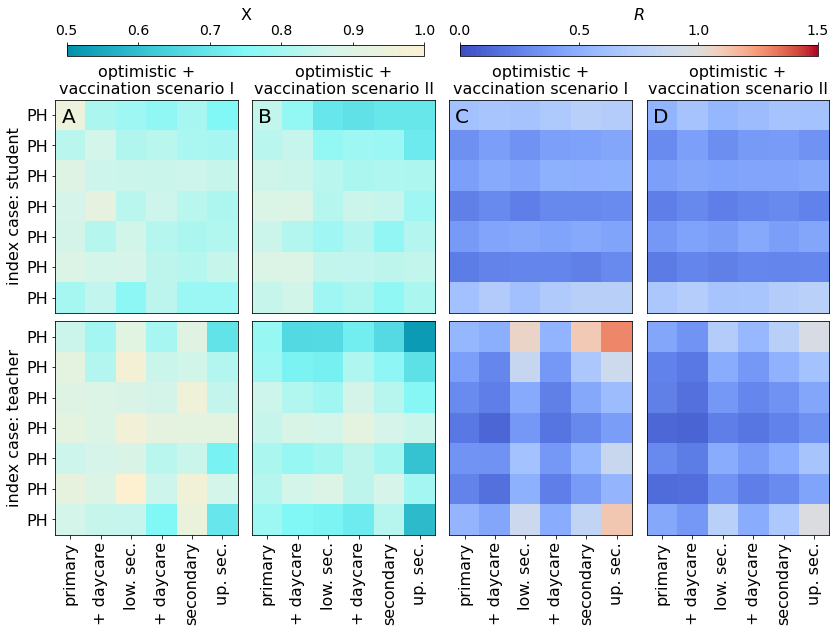

In [72]:
dst = '../../plots/sensitivity_analysis/'
fig, axes = plt.subplots(2, 4, figsize=(14, 8))

#measure_labels = [mc['label'] for mc in measure_combinations]
measure_labels = ['PH' for mc in measure_combinations]
cmaps = {'vaccination_1':daf.get_continuous_cmap(hex_list1),
         'vaccination_2':daf.get_continuous_cmap(hex_list1)}
vmax = {'vaccination_1':1,
        'vaccination_2':1}

scenarios = ['vaccination_1', 'vaccination_2']
titles = {'vaccination_1':'optimistic +\nvaccination scenario I',
          'vaccination_2':'optimistic +\nvaccination scenario II'}

for j, scenario in enumerate(scenarios):
        
    # N-infected plots
    student = colormaps_vaccinations[scenario]['N_infected']['student'] /\
              colormaps_vaccinations['baseline']['N_infected']['student']

    teacher = colormaps_vaccinations[scenario]['N_infected']['teacher'] /\
              colormaps_vaccinations['baseline']['N_infected']['teacher']
    tmp_N_infected = {'student':student, 'teacher':teacher}
    
    img = axes[0, j].imshow(tmp_N_infected['student'], vmin=0.5,
                vmax=vmax[scenario], cmap=cmaps[scenario])
    img = axes[1, j].imshow(tmp_N_infected['teacher'], vmin=0.5,
                vmax=vmax[scenario], cmap=cmaps[scenario])
    colormaps_vaccinations[scenario]['N_infected']['img'] = img

    # R0 plots
    student_R0 = colormaps_vaccinations[scenario]['R0']['student'] 
    teacher_R0 = colormaps_vaccinations[scenario]['R0']['teacher']
    tmp_R0 = {'student':student_R0, 'teacher':teacher_R0}

    vmax_R0 = np.maximum(student_R0, teacher_R0).max()
    vmin_R0 = np.minimum(student_R0, teacher_R0).min()
    img = axes[0, j + 2].imshow(tmp_R0['student'], 
                    clim = (0, 1.5), 
                    norm = daf.MidpointNormalize(midpoint=1, vmin=0, vmax=1.5), 
                    cmap=plt.get_cmap('coolwarm'))
    img = axes[1, j + 2].imshow(tmp_R0['teacher'], 
                    clim = (0, 1.5), 
                    norm = daf.MidpointNormalize(midpoint=1, vmin=0, vmax=1.5), 
                    cmap=plt.get_cmap('coolwarm'))
    colormaps_vaccinations[scenario]['R0']['img'] = img
    

for j in range(4):
    axes[0, j].set_title(titles[scenarios[j%2]], fontsize=16)
    for i in range(2):
        if j == 0:
            axes[i, j].set_yticks(range(len(measure_labels)))
            axes[i, j].set_yticklabels(measure_labels, fontsize=16)
        else:
            axes[i, j].set_yticks([])
            axes[i, j].set_yticklabels([])
        if i == 1:
            axes[i, j].set_xticks(range(len(school_types)))
            axes[i, j].set_xticklabels(['primary', '+ daycare', 'low. sec.',
                            '+ daycare', 'secondary', 'up. sec.',], fontsize=16)
            axes[i, j].tick_params(axis='x', rotation=90)
        else:
            axes[i, j].set_xticklabels([])
            axes[i, j].set_xticks([])
            
axes[0, 0].set_ylabel('index case: student', fontsize=16)
axes[1, 0].set_ylabel('index case: teacher', fontsize=16)

cbar_ax1 = fig.add_axes([0.14, 0.955, 0.355, 0.02])
cbar1 = fig.colorbar(colormaps_vaccinations['vaccination_1']['N_infected']['img'],\
        cax=cbar_ax1, orientation='horizontal', ticks=[0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
cbar1.ax.set_xticklabels(['0.5', '0.6', '0.7', '0.8', '0.9', '1.0']) 
cbar1.set_label('X', fontsize=16)
cbar_ax1.xaxis.set_ticks_position('top')
cbar_ax1.xaxis.set_label_position('top')
cbar1.ax.tick_params(labelsize=14)


cbar_ax2 = fig.add_axes([0.53, 0.955, 0.355, 0.02])
cbar2 = fig.colorbar(colormaps_vaccinations['vaccination_1']['R0']['img'],\
                    cax=cbar_ax2, orientation='horizontal', ticks=[0, 0.5, 1, 1.5])
cbar2.set_label('$R$', fontsize=16)
cbar2.ax.tick_params(labelsize=14)
cbar_ax2.xaxis.set_ticks_position('top')
cbar_ax2.xaxis.set_label_position('top')

plt.subplots_adjust(wspace=0.04, hspace=0.04)

fig.text(0.135, 0.84, 'A', fontsize=20)
fig.text(0.33, 0.84, 'B', fontsize=20)
fig.text(0.525, 0.84, 'C', fontsize=20)
fig.text(0.722, 0.84, 'D', fontsize=20)

plt.savefig(join(dst, 'vaccinations.svg'))
plt.savefig(join(dst, 'vaccinations.pdf'),
            bbox_extra_artists=[cbar1, cbar2])